#Import Library

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Data

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/application_train.csv')
#df_train = pd.read_csv('/content/drive/MyDrive/Data Analytics Zenius/Final Project/application_train.csv')
print('Home Credit Default Risk Dataset has %d rows and %d columns.\n' % df_train.shape)
df_train.head()

Home Credit Default Risk Dataset has 307511 rows and 122 columns.



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#Data Understanding

In [ ]:
print('Data types: \n')
df_train.info(verbose=True)

Data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    in

In [ ]:
# Number of each type of column
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [ ]:
home = df_train.copy()

#Exploratory Data Analysis

##Univariate

**Customer by Target**

In [ ]:
decode_mapping = {0: "No Payment Difficulties", 1: "Payment Difficulties"}
def decode_sentiment(label):
    return decode_mapping[int(label)]
home['TARGET'] = home['TARGET'].apply(lambda x: decode_sentiment(x))

In [ ]:
num_customer = home.groupby('TARGET')['CODE_GENDER'].count().reset_index()
num_customer.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

num_customer['Customers_pct'] = round(num_customer.Customers / num_customer.Customers.sum(), 2)
num_customer

,TARGET,Customers,Customers_pct
0,No Payment Difficulties,282686,0.92
1,Payment Difficulties,24825,0.08


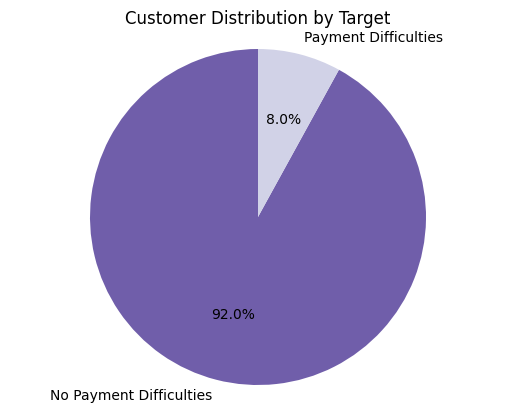

In [ ]:
labels = num_customer['TARGET']
sizes = num_customer['Customers_pct']
colors = ['#705eaa', '#d1d2e7']  # Warna

# Membuat pie chart
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%',
        startangle=90)

# Konfigurasi tambahan
plt.axis('equal')  # Membuat pie chart menjadi lingkaran sempurna
plt.title('Customer Distribution by Target')

# Menampilkan pie chart
plt.show()

Dari tabel dan chart di atas, kita dapat melihat 92% tidak memiliki masalah dalam melunasi pinjaman pada waktu tertentu dan 8% bermasalah, jadi mari kita gali lebih dalam kriteria apakah nasabah tidak bermasalah dalam membayar kembali pinjamannya.

Dataset ini termasuk imbalanced sehingga perlu dilakukan resampling sebelum dilakukan pemodelan.

## Bivariate : Categorical Features Vs Target

###Contract Type, Gender, Car Ownership Status, and Realty Ownership Status

<Axes: title={'center': '\nClients Repayment Abilities By Realty Ownership Status\n'}, xlabel='FLAG_OWN_REALTY', ylabel='count'>

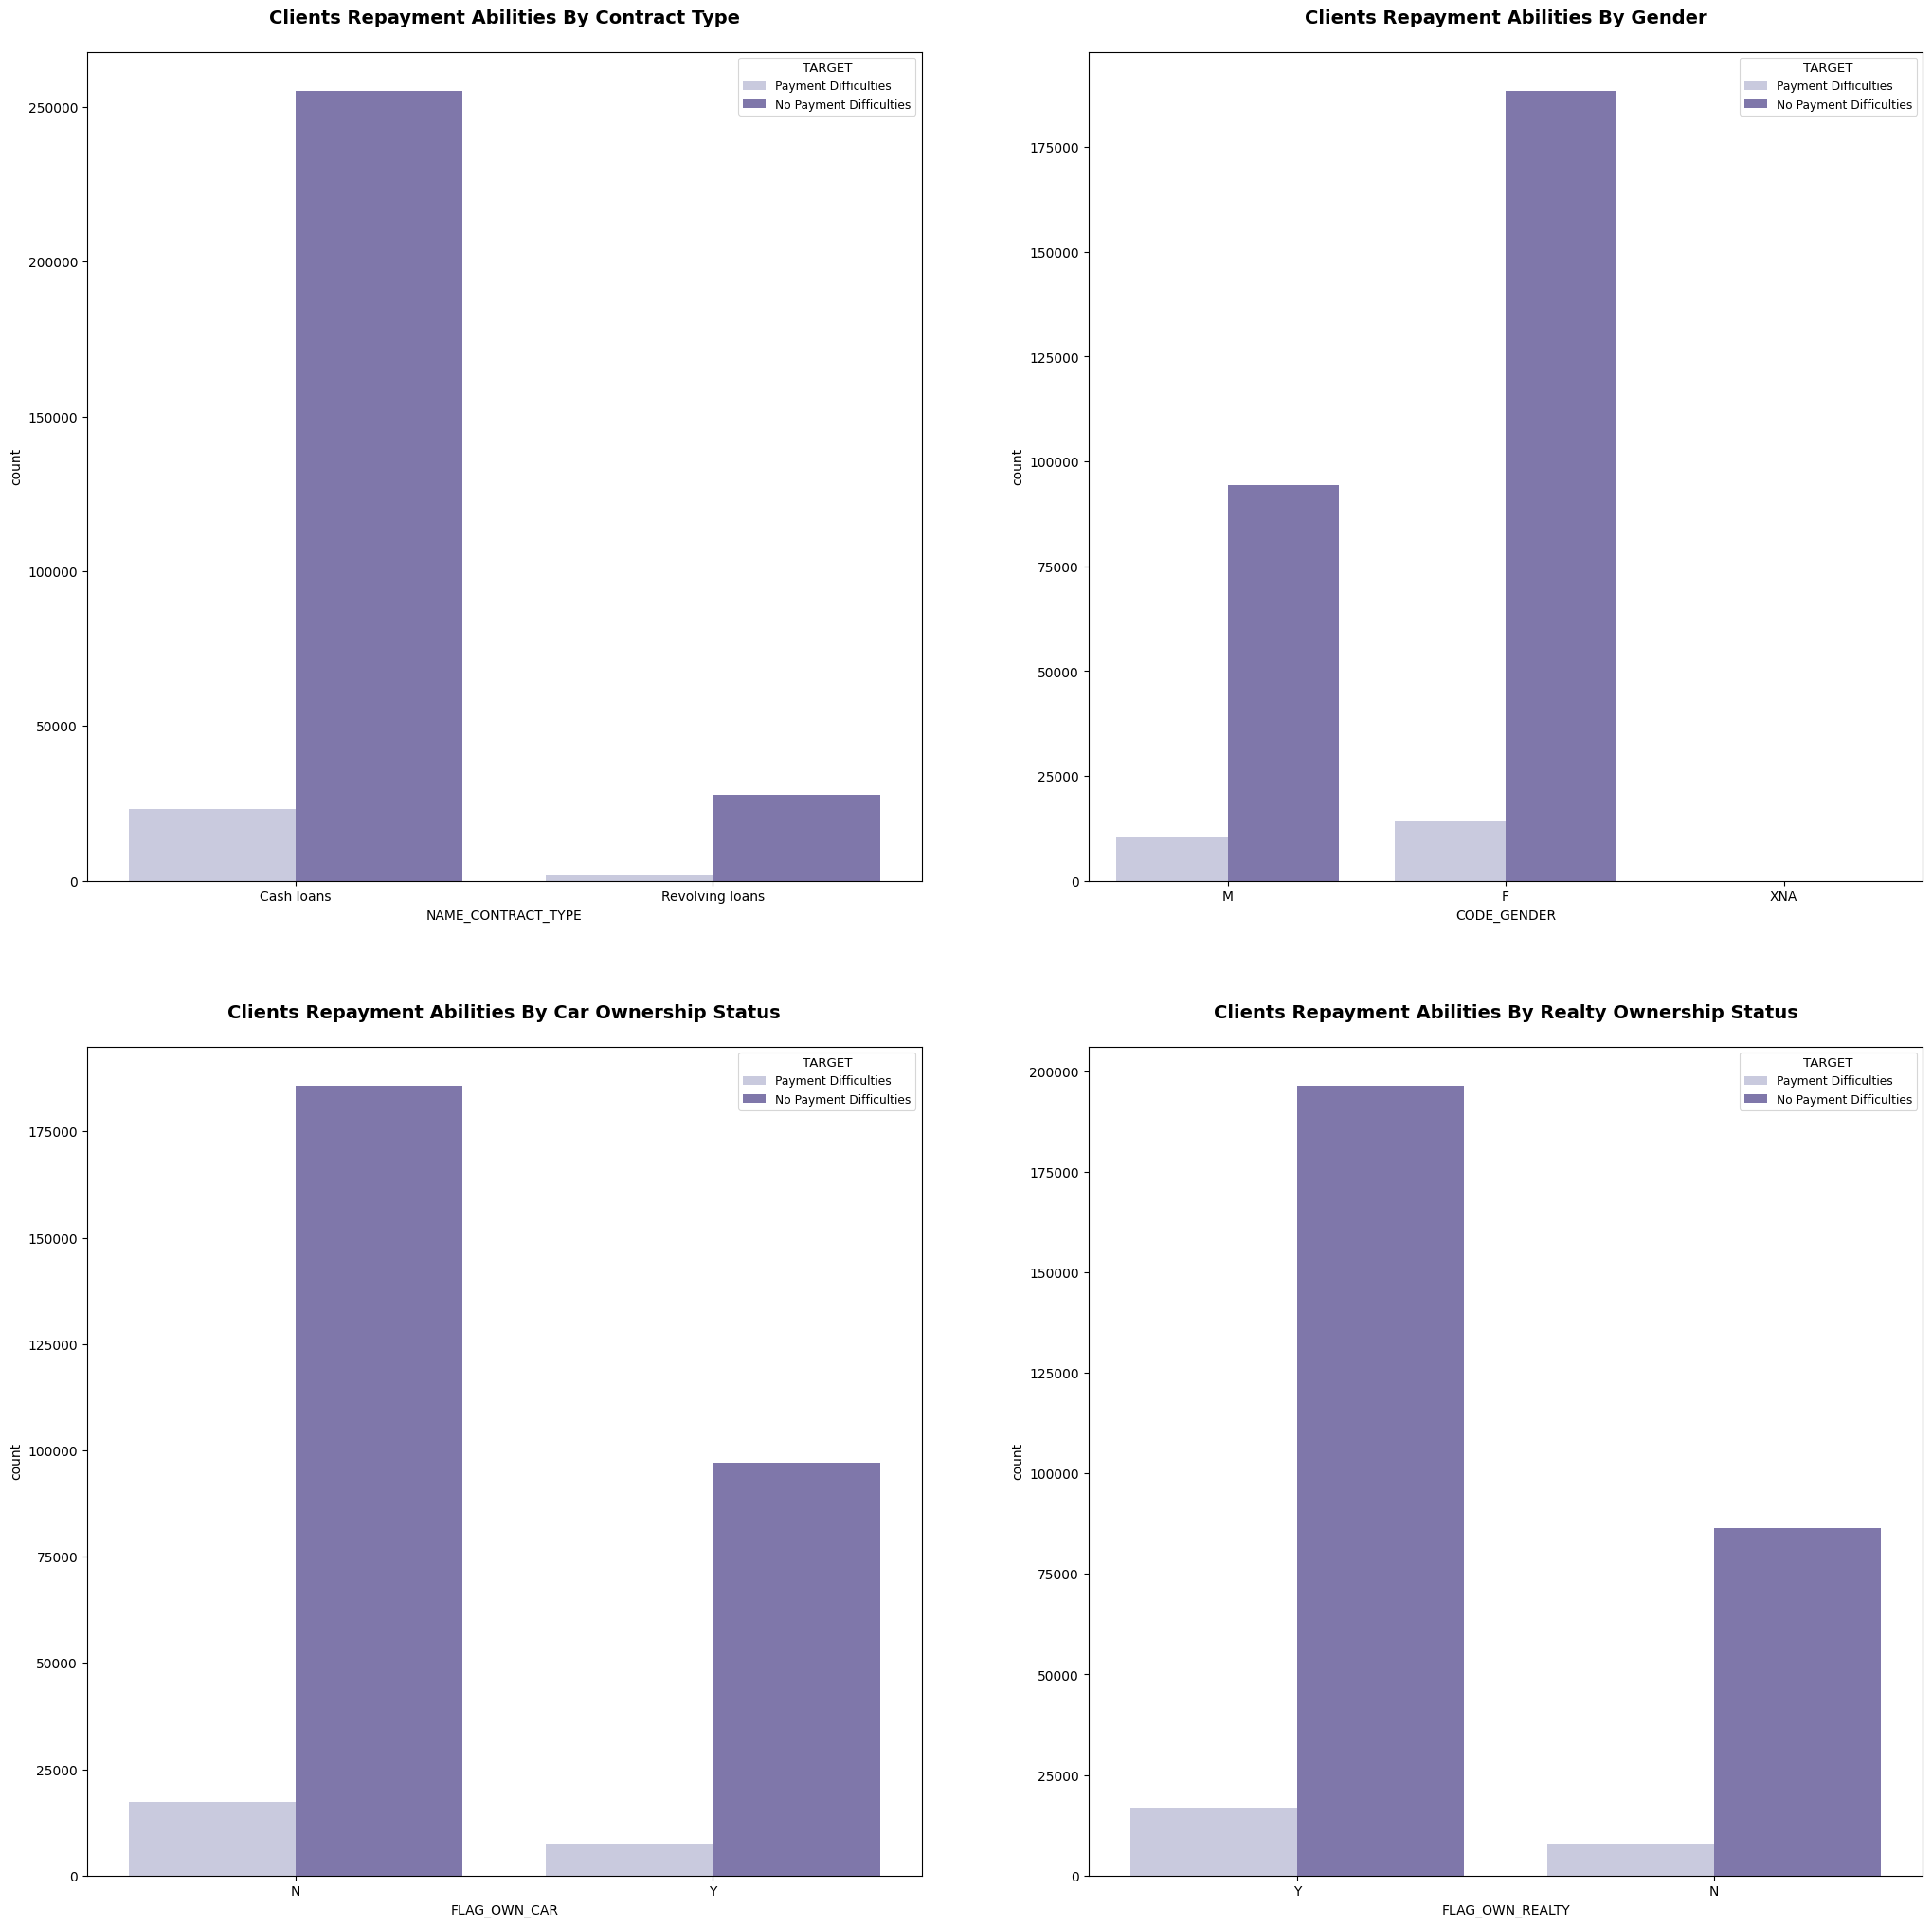

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(25,25))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Contract Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data = home, hue = 'TARGET', palette = 'Purples', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Gender\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data = home, hue = 'TARGET', palette = 'Purples', ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Car Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data = home, hue = 'TARGET', palette = 'Purples', ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Realty Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data = home, hue = 'TARGET', palette = 'Purples', ax=ax[1][1])

**Contract Type Vs Target**

In [ ]:
ct = home.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Contract Type')
ct.sort_values(by='NAME_CONTRACT_TYPE', ascending=True)

Clients Repayment Abilities By Contract Type


,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,No Payment Difficulties,255011
1,Cash loans,Payment Difficulties,23221
2,Revolving loans,No Payment Difficulties,27675
3,Revolving loans,Payment Difficulties,1604


Mayoritas peminjam mengajukan pinjaman tipe cash loans dengan sekitar 278 ribu peminjam. Sementara pinjaman tipe revolving loans memiliki jumlah yang jauh lebih rendah sekitar 29 ribu dibandingkan dengan cash loans.

**Gender Vs Target**

In [ ]:
home['CODE_GENDER'] = home['CODE_GENDER'].replace(['F','M'],['Female','Male'])

In [ ]:
gt = home.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Gender')
gt.sort_values(by='CODE_GENDER', ascending=True)

Clients Repayment Abilities By Gender


,CODE_GENDER,TARGET,SK_ID_CURR
0,Female,No Payment Difficulties,188278
1,Female,Payment Difficulties,14170
2,Male,No Payment Difficulties,94404
3,Male,Payment Difficulties,10655
4,XNA,No Payment Difficulties,4


In [ ]:
df_train[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,CODE_GENDER,TARGET
1,M,0.101419
0,F,0.069993
2,XNA,0.000000


Pengajuan pinjaman sebagian besar dilakukan oleh perempuan. Secara total, ada sekitar 202.448 aplikasi pinjaman yang diajukan oleh perempuan, dan sekitar 105.059 aplikasi diajukan oleh laki-laki.

Namun, persentase yang lebih besar (sekitar 10% dari total) laki-laki memiliki masalah dalam membayar pinjaman dibandingkan dengan nasabah perempuan (sekitar 7%).

**Car Ownership Status Vs Target**

In [ ]:
home['FLAG_OWN_CAR'] = home['FLAG_OWN_CAR'].replace(['Y','N'],['Yes','No'])

In [ ]:
ot = home.groupby(by=['FLAG_OWN_CAR','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Car Ownership Status')
ot.sort_values(by='FLAG_OWN_CAR', ascending=True)

Clients Repayment Abilities By Car Ownership Status


,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,No,No Payment Difficulties,185675
1,No,Payment Difficulties,17249
2,Yes,No Payment Difficulties,97011
3,Yes,Payment Difficulties,7576


In [ ]:
df_train[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_CAR,TARGET
0,N,0.085002
1,Y,0.072437


Sebagian besar nasabah tidak memiliki mobil.Nasabah yang tidak memiliki mobil (sekitar 8%) mengalami kesulitan dalam pengembalian pinjaman dibandingkan dengan nasabah yang memiliki mobil (sekitar 7%). Namun, perbedaannya tidak terlalu signifikan.

**Realty Ownership Status Vs Target**

In [ ]:
home['FLAG_OWN_REALTY'] = home['FLAG_OWN_REALTY'].replace(['Y','N'],['Yes','No'])

In [ ]:
rt = home.groupby(by=['FLAG_OWN_REALTY','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Realty Ownership Status')
rt.sort_values(by='FLAG_OWN_REALTY', ascending=True)

Clients Repayment Abilities By Realty Ownership Status


,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
0,No,No Payment Difficulties,86357
1,No,Payment Difficulties,7842
2,Yes,No Payment Difficulties,196329
3,Yes,Payment Difficulties,16983


In [ ]:
df_train[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_REALTY,TARGET
0,N,0.083249
1,Y,0.079616


Sebagian besar nasabah memiliki flat / rumah. Nasabah yang tidak memiliki rumah/flat (sekitar 8%) mengalami kesulitan dalam pengembalian pinjaman dibandingkan nasabah yang memiliki rumah/flat (sekitar 7%). Namun, perbedaannya tidak terlalu signifikan.

###Suite Type, Income Type, Education Type, and Family Status

<Axes: title={'center': '\nClients Repayment Abilities By Family Status\n'}, xlabel='NAME_FAMILY_STATUS', ylabel='count'>

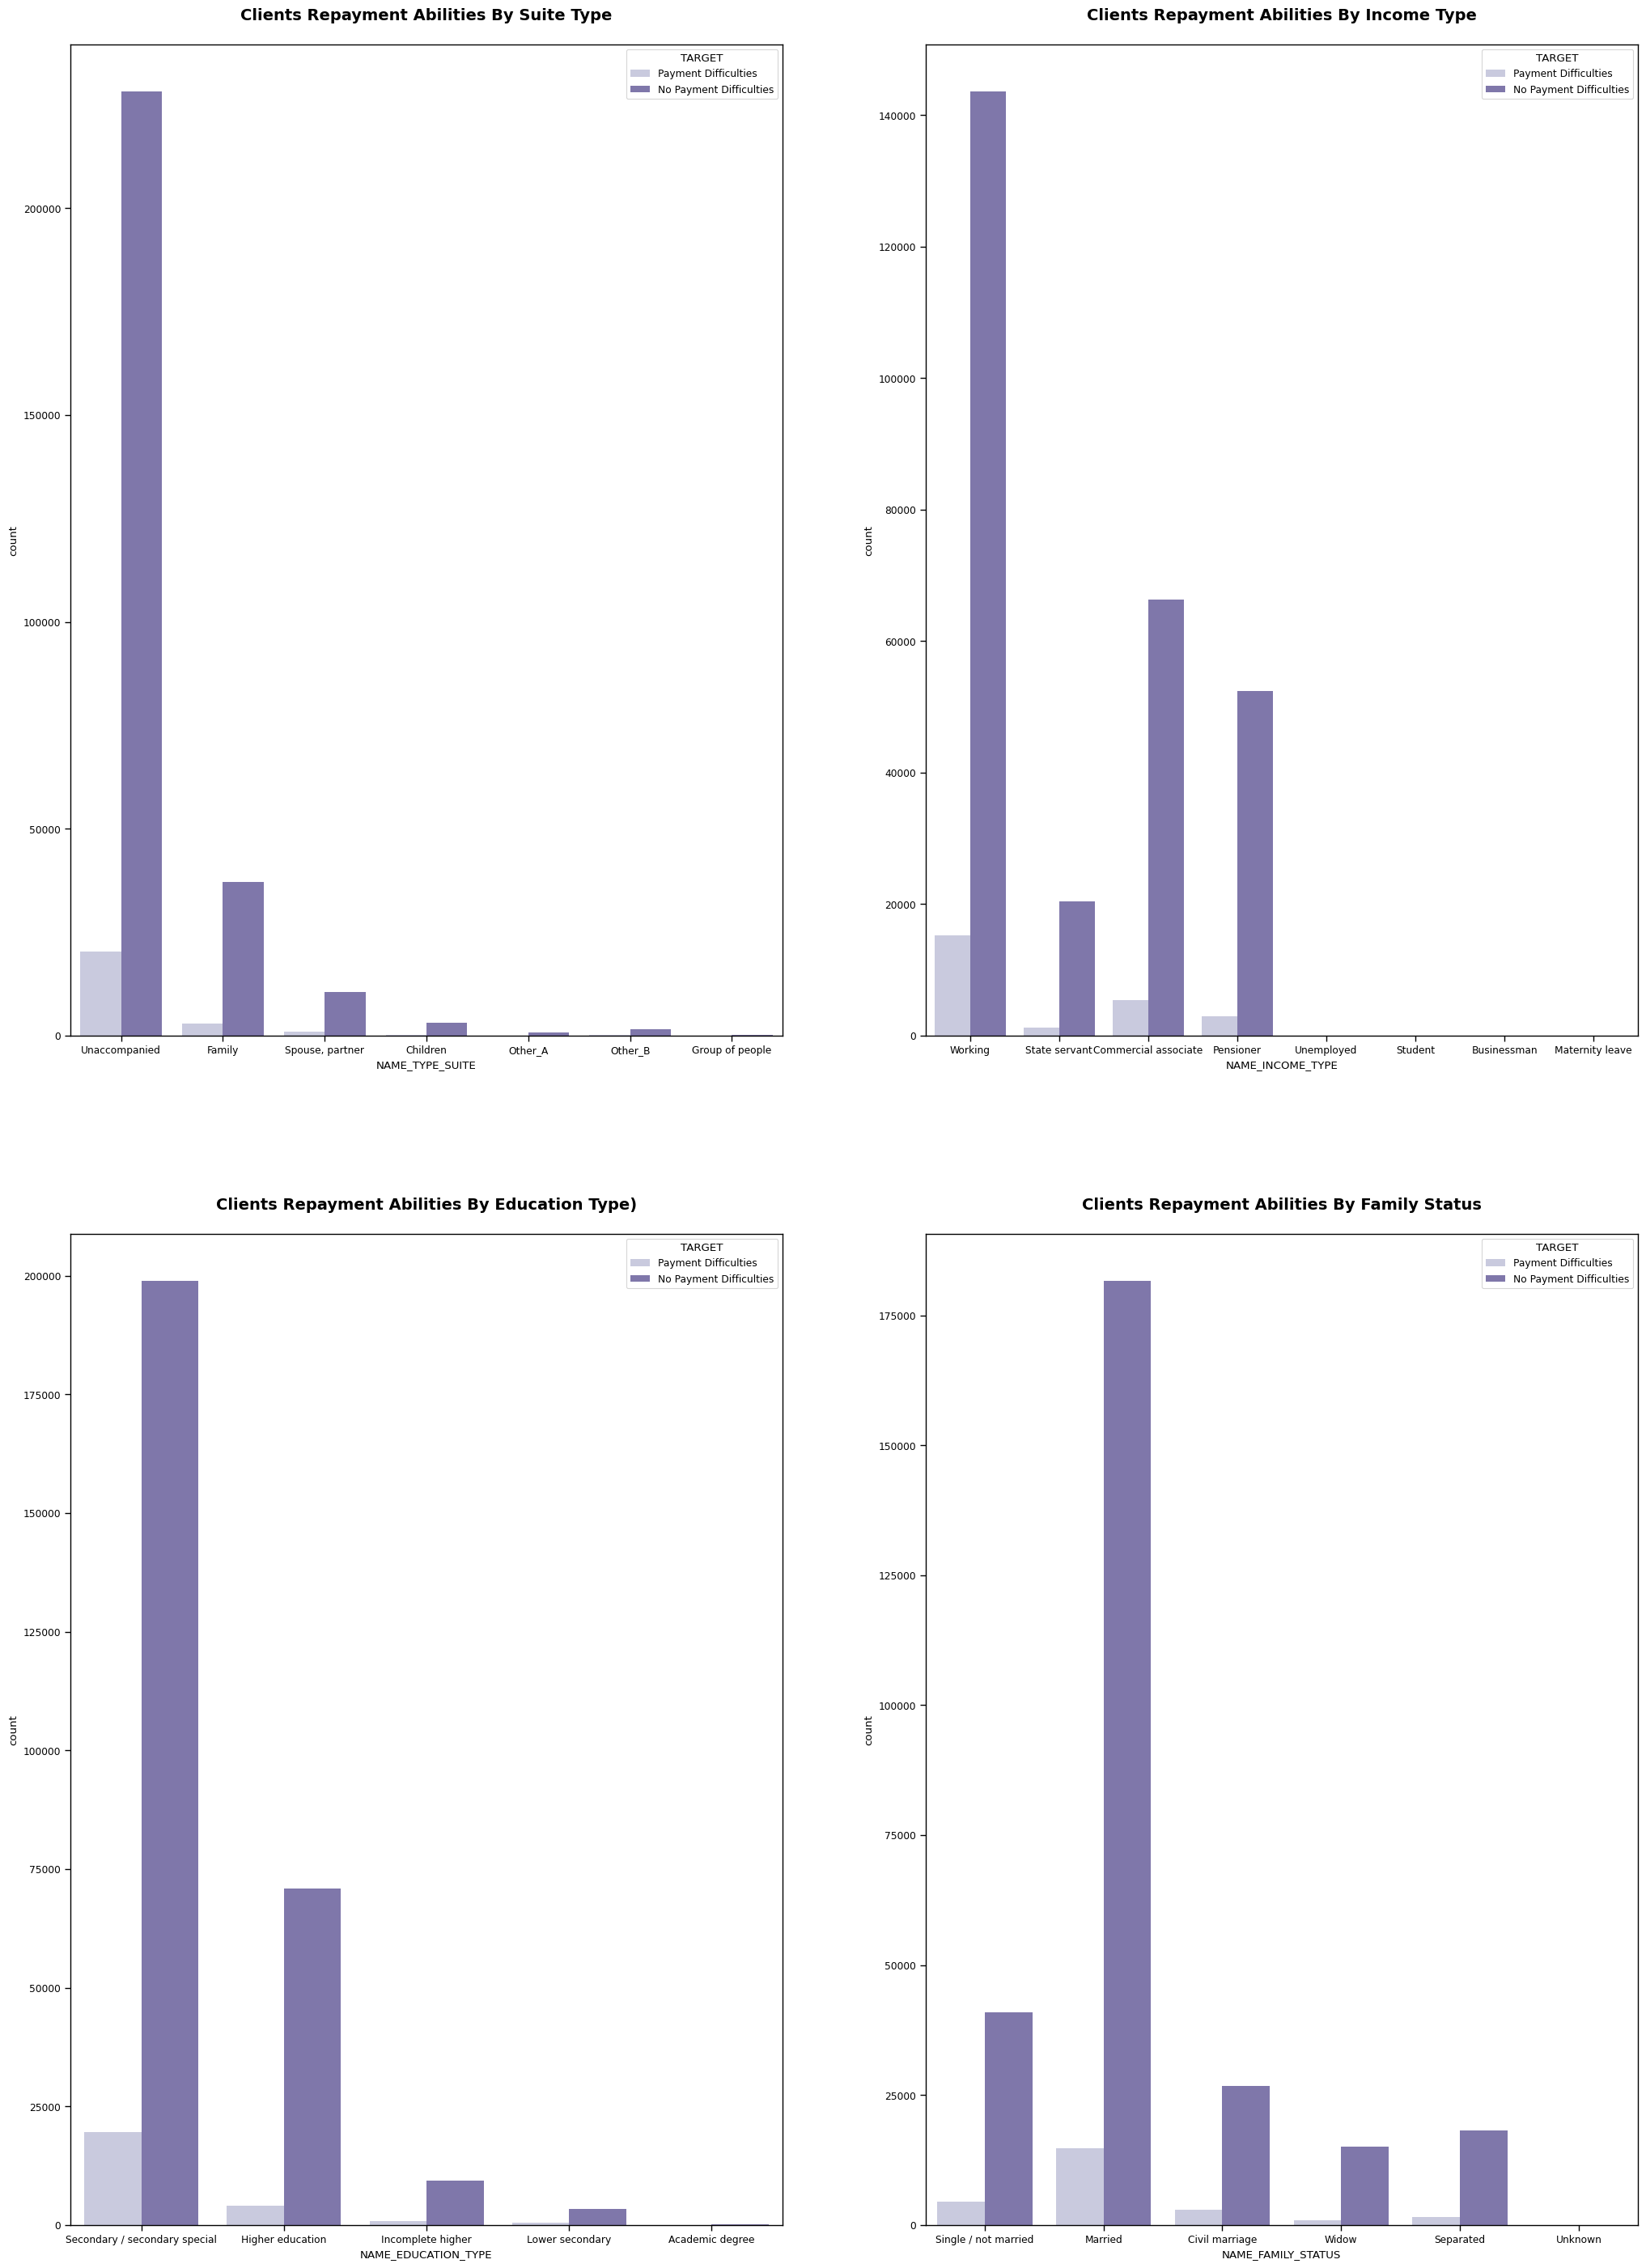

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(25,35))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Suite Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_TYPE_SUITE', data = home, hue = 'TARGET', palette = 'Purples', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Income Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data = home, hue = 'TARGET', palette = 'Purples', ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Education Type)\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_EDUCATION_TYPE', data = home, hue = 'TARGET', palette = 'Purples', ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Family Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data = home, hue = 'TARGET', palette = 'Purples', ax=ax[1][1])

**Suite Type Vs Target**

In [ ]:
st = home.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Suite Type')
st.sort_values(by='NAME_TYPE_SUITE', ascending=True)

Clients Repayment Abilities By Suite Type


,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
0,Children,No Payment Difficulties,3026
1,Children,Payment Difficulties,241
2,Family,No Payment Difficulties,37140
3,Family,Payment Difficulties,3009
4,Group of people,No Payment Difficulties,248
5,Group of people,Payment Difficulties,23
6,Other_A,No Payment Difficulties,790
7,Other_A,Payment Difficulties,76
8,Other_B,No Payment Difficulties,1596
9,Other_B,Payment Difficulties,174


In [ ]:
df_train[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_TYPE_SUITE,TARGET
4,Other_B,0.098305
3,Other_A,0.087760
2,Group of people,0.084871
6,Unaccompanied,0.081830
5,"Spouse, partner",0.078716
1,Family,0.074946
0,Children,0.073768


Nasabah yang didampingi oleh Other_b saat mengajukan pinjaman memiliki persentase kesulitan pengembalian pinjaman yang lebih tinggi (sekitar 10%).

**Income Type Vs Target**

In [ ]:
rt = home.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Income Type')
rt.sort_values(by='NAME_INCOME_TYPE', ascending=True)

Clients Repayment Abilities By Income Type


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
0,Businessman,No Payment Difficulties,10
1,Commercial associate,No Payment Difficulties,66257
2,Commercial associate,Payment Difficulties,5360
3,Maternity leave,No Payment Difficulties,3
4,Maternity leave,Payment Difficulties,2
5,Pensioner,No Payment Difficulties,52380
6,Pensioner,Payment Difficulties,2982
7,State servant,No Payment Difficulties,20454
8,State servant,Payment Difficulties,1249
9,Student,No Payment Difficulties,18


In [ ]:
df_train[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095885
1,Commercial associate,0.074843
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


Dapat dilihat bahwa nasabah yang memiliki penghasilan jenis bekerja telah mengajukan sebagian besar pinjaman, ada sekitar 158.774 aplikasi pinjaman.

Nasabah dengan jenis penghasilan pengusaha dan siswa tidak mengalami kesulitan dalam mengembalikan pinjamannya.Sedangkan klien dengan jenis penghasilan cuti hamil dan menganggur memiliki persentase tertinggi (sekitar 40% dan 36%) mengalami kendala dalam pengembalian pinjaman.

**Education Type Vs Target**

In [ ]:
et = home.groupby(by=['NAME_EDUCATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Education Type')
et.sort_values(by='NAME_EDUCATION_TYPE', ascending=True)

Clients Repayment Abilities By Education Type


,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
0,Academic degree,No Payment Difficulties,161
1,Academic degree,Payment Difficulties,3
2,Higher education,No Payment Difficulties,70854
3,Higher education,Payment Difficulties,4009
4,Incomplete higher,No Payment Difficulties,9405
5,Incomplete higher,Payment Difficulties,872
6,Lower secondary,No Payment Difficulties,3399
7,Lower secondary,Payment Difficulties,417
8,Secondary / secondary special,No Payment Difficulties,198867
9,Secondary / secondary special,Payment Difficulties,19524


In [ ]:
df_train[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.109277
4,Secondary / secondary special,0.089399
2,Incomplete higher,0.084850
1,Higher education,0.053551
0,Academic degree,0.018293


Sejumlah besar aplikasi (218K) diajukan oleh nasabah yang memiliki pendidikan menengah diikuti oleh nasabah dengan pendidikan tinggi dengan aplikasi 75K.

Nasabah dengan jenis pendidikan SMP memiliki persentase tertinggi (sekitar 10%) mengalami kendala dalam pengembalian pinjaman.

**Family Status Vs Target**

In [ ]:
ft = home.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Family Status')
ft.sort_values(by='NAME_FAMILY_STATUS', ascending=True)

Clients Repayment Abilities By Family Status


,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
0,Civil marriage,No Payment Difficulties,26814
1,Civil marriage,Payment Difficulties,2961
2,Married,No Payment Difficulties,181582
3,Married,Payment Difficulties,14850
4,Separated,No Payment Difficulties,18150
5,Separated,Payment Difficulties,1620
6,Single / not married,No Payment Difficulties,40987
7,Single / not married,Payment Difficulties,4457
8,Unknown,No Payment Difficulties,2
9,Widow,No Payment Difficulties,15151


In [ ]:
df_train[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099446
3,Single / not married,0.098077
2,Separated,0.081942
1,Married,0.075599
5,Widow,0.058242
4,Unknown,0.000000


###Housing Type, Occupation Type, Process Day, and Organization Type

**Housing Type Vs Target**

In [ ]:
ht = home.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Housing Type')
ht.sort_values(by='NAME_HOUSING_TYPE', ascending=True)

Clients Repayment Abilities By Housing Type


,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
0,Co-op apartment,No Payment Difficulties,1033
1,Co-op apartment,Payment Difficulties,89
2,House / apartment,No Payment Difficulties,251596
3,House / apartment,Payment Difficulties,21272
4,Municipal apartment,No Payment Difficulties,10228
5,Municipal apartment,Payment Difficulties,955
6,Office apartment,No Payment Difficulties,2445
7,Office apartment,Payment Difficulties,172
8,Rented apartment,No Payment Difficulties,4280
9,Rented apartment,Payment Difficulties,601


In [ ]:
df_train[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.123131
5,With parents,0.116981
2,Municipal apartment,0.085397
0,Co-op apartment,0.079323
1,House / apartment,0.077957
3,Office apartment,0.065724


Text(0.5, 0, '\nHousing Type')

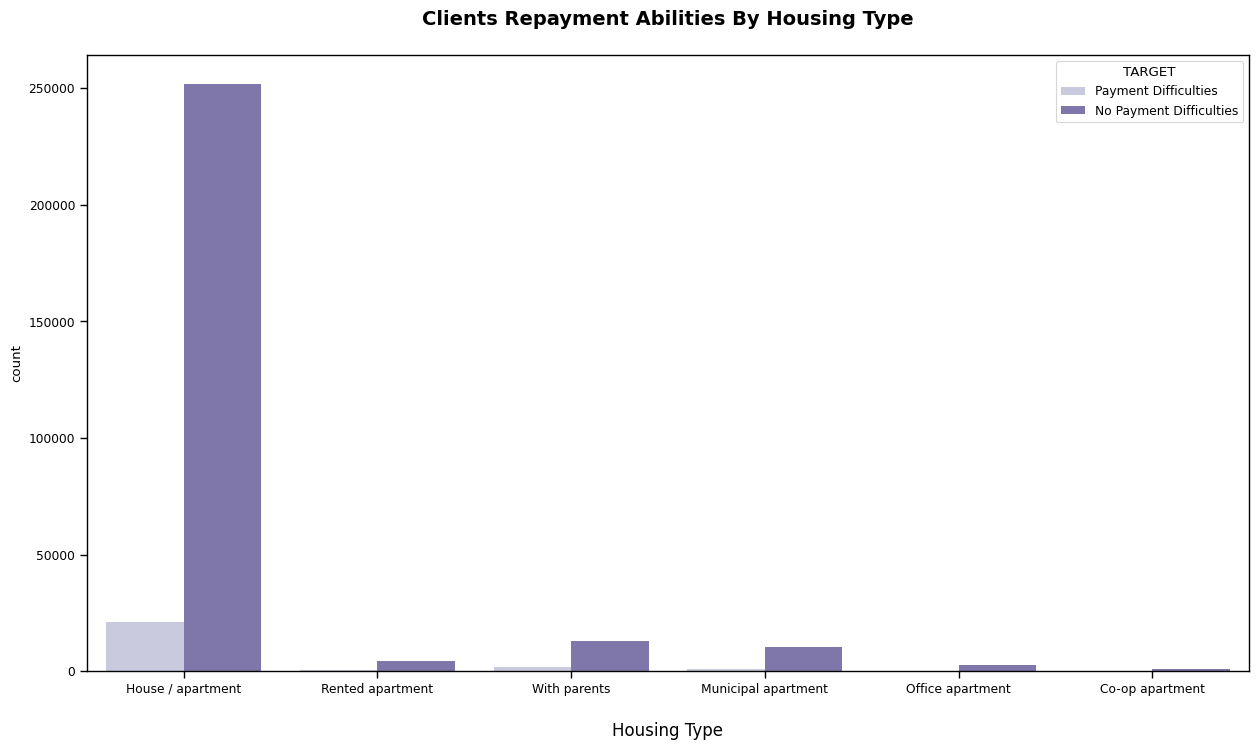

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.countplot(x='NAME_HOUSING_TYPE', data = home, hue = 'TARGET', palette = 'Purples')
plt.title('Clients Repayment Abilities By Housing Type\n', fontweight='bold', fontsize=14)
plt.xlabel('\nHousing Type', fontsize=12)

Jumlah pengajuan pinjaman terbanyak yaitu sebesar 272K dilakukan oleh nasabah yang memiliki rumah/apartemen.

**Occupation Type Vs Target**

In [ ]:
ot = home.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Occupation Type')
ot.sort_values(by='OCCUPATION_TYPE', ascending=True)

Clients Repayment Abilities By Occupation Type


,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,No Payment Difficulties,9339
1,Accountants,Payment Difficulties,474
2,Cleaning staff,No Payment Difficulties,4206
3,Cleaning staff,Payment Difficulties,447
4,Cooking staff,No Payment Difficulties,5325
5,Cooking staff,Payment Difficulties,621
6,Core staff,No Payment Difficulties,25832
7,Core staff,Payment Difficulties,1738
8,Drivers,No Payment Difficulties,16496
9,Drivers,Payment Difficulties,2107


In [ ]:
df_train[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.171524
4,Drivers,0.113261
17,Waiters/barmen staff,0.112760
16,Security staff,0.107424
8,Laborers,0.105788
2,Cooking staff,0.104440
14,Sales staff,0.096318
1,Cleaning staff,0.096067
13,Realty agents,0.078562
15,Secretaries,0.070498


Sejumlah besar aplikasi (55K) diajukan oleh nasabah yang bekerja sebagai Buruh.

Terlihat bahwa nasabah dengan jenis pekerjaan Low-skill Laborers memiliki persentase tertinggi (sekitar 17%) mengalami kendala dalam pengembalian pinjaman.

**Process Day Vs Target**

In [ ]:
pt = home.groupby(by=['WEEKDAY_APPR_PROCESS_START','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Process Day')
pt.sort_values(by='WEEKDAY_APPR_PROCESS_START', ascending=True)

Clients Repayment Abilities By Process Day


,WEEKDAY_APPR_PROCESS_START,TARGET,SK_ID_CURR
0,FRIDAY,No Payment Difficulties,46237
1,FRIDAY,Payment Difficulties,4101
2,MONDAY,No Payment Difficulties,46780
3,MONDAY,Payment Difficulties,3934
4,SATURDAY,No Payment Difficulties,31182
5,SATURDAY,Payment Difficulties,2670
6,SUNDAY,No Payment Difficulties,14898
7,SUNDAY,Payment Difficulties,1283
8,THURSDAY,No Payment Difficulties,46493
9,THURSDAY,Payment Difficulties,4098


In [ ]:
df_train[['WEEKDAY_APPR_PROCESS_START','TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,WEEKDAY_APPR_PROCESS_START,TARGET
5,TUESDAY,0.083505
6,WEDNESDAY,0.081604
0,FRIDAY,0.081469
4,THURSDAY,0.081003
3,SUNDAY,0.079291
2,SATURDAY,0.078873
1,MONDAY,0.077572


Text(0.5, 0, '\nProcess Day')

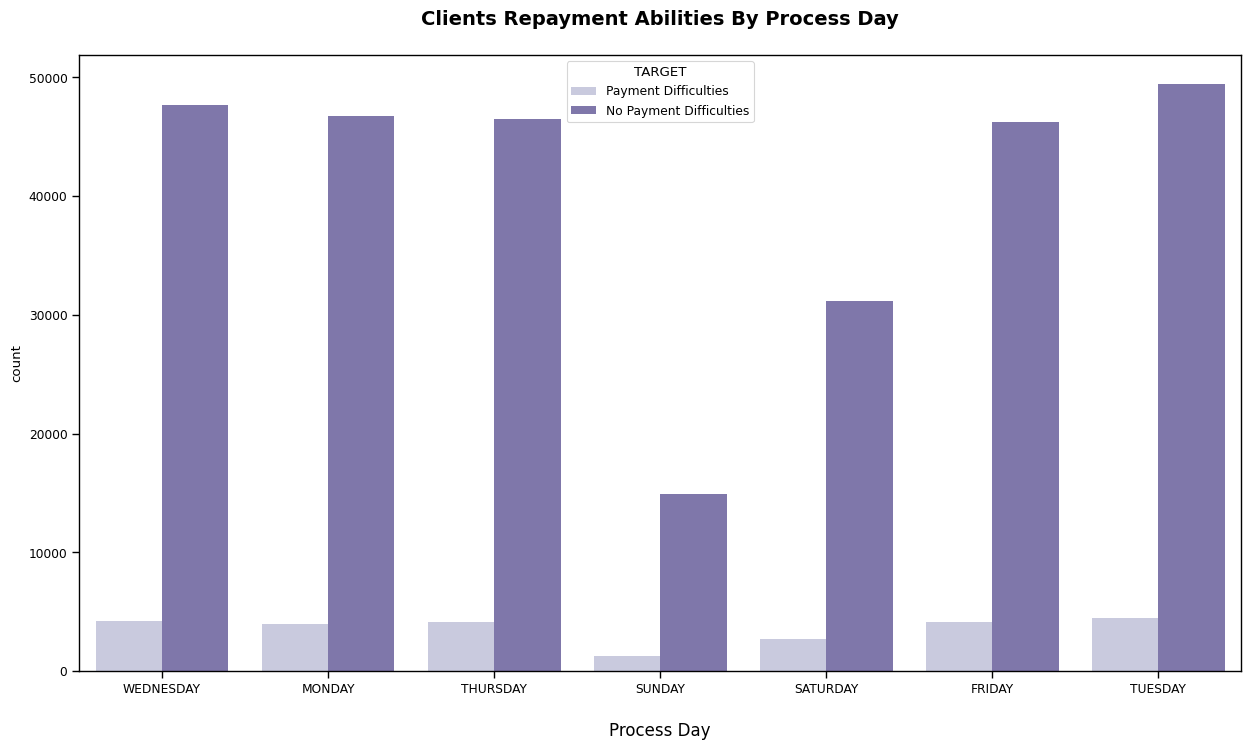

In [ ]:
# visualization
plt.figure(figsize=(15,8))
fig = sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data = home, hue = 'TARGET', palette = 'Purples')
plt.title('Clients Repayment Abilities By Process Day\n', fontweight='bold', fontsize=14)
plt.xlabel('\nProcess Day', fontsize=12)

Terlihat bahwa pengerjaan aplikasi memiliki persentase yang hampir sama setiap hari (sekitar 7% - 8%) mengalami kendala dalam pengembalian pinjaman.

**Organization Type Vs Target**

In [ ]:
tt = home.groupby(by=['ORGANIZATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Suite Type')
tt.sort_values(by='ORGANIZATION_TYPE', ascending=True)

Clients Repayment Abilities By Suite Type


,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
0,Advertising,No Payment Difficulties,394
1,Advertising,Payment Difficulties,35
2,Agriculture,No Payment Difficulties,2197
3,Agriculture,Payment Difficulties,257
4,Bank,No Payment Difficulties,2377
5,Bank,Payment Difficulties,130
6,Business Entity Type 1,No Payment Difficulties,5497
7,Business Entity Type 1,Payment Difficulties,487
8,Business Entity Type 2,No Payment Difficulties,9653
9,Business Entity Type 2,Payment Difficulties,900


In [ ]:
df_train[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,ORGANIZATION_TYPE,TARGET
54,Transport: type 3,0.157540
18,Industry: type 13,0.134328
25,Industry: type 8,0.125000
38,Restaurant,0.117062
7,Construction,0.116798
6,Cleaning,0.111538
14,Industry: type 1,0.110683
20,Industry: type 3,0.106162
36,Realtor,0.106061
1,Agriculture,0.104727


Nasabah dengan tipe organisasi transportasi (tipe 3) memiliki persentase tertinggi (sekitar 15%)mengalami kendala dalam pengembalian pinjaman.

##Bivariate: Numerical Features Vs Target

**Amount Credit of the Loan Vs Target**

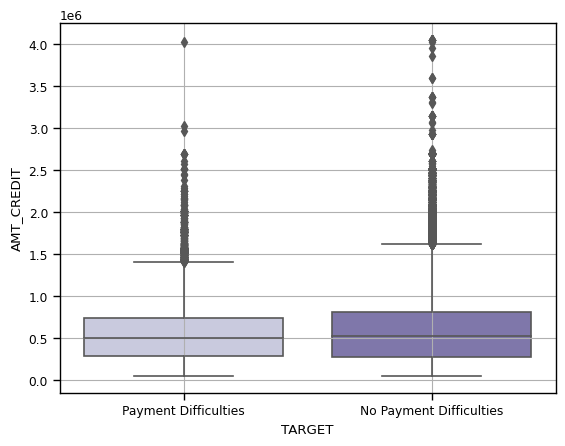

In [ ]:
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=home, palette = 'Purples')
plt.grid()
plt.show()

Terlihat bahwa nilai median jumlah kredit nasabah yang tidak mengalami kesulitan pembayaran sedikit lebih besar dibandingkan dengan nilai median nasabah yang mengalami kesulitan pembayaran. Artinya, nasabah dengan jumlah kredit yang lebih tinggi memiliki peluang yang sedikit lebih tinggi untuk mampu membayar kembali pinjamannya dibandingkan dengan nasabah dengan jumlah kredit yang lebih rendah.

**Amount Income Vs Target**

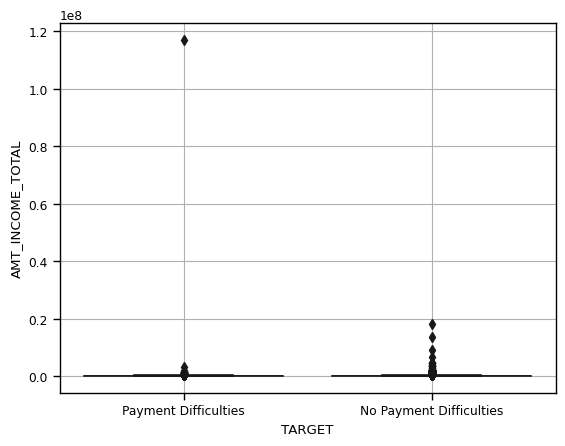

In [ ]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=home, palette = 'dark:salmon')
plt.grid()
plt.show()

Terlihat bahwa baik nasabah yang mengalami kesulitan pembayaran maupun nasabah yang tidak mengalami kesulitan pembayaran, sebagian besar memiliki nilai yang sama. Namun, dengan meningkatnya pendapatan nasabah, kemungkinan bahwa nasabah tidak akan mengalami kesulitan membayar kembali pinjaman juga meningkat.

**Age Vs target**

In [ ]:
no_age = df_train[df_train['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = df_train[df_train['TARGET']==1]['DAYS_BIRTH'].values/-365

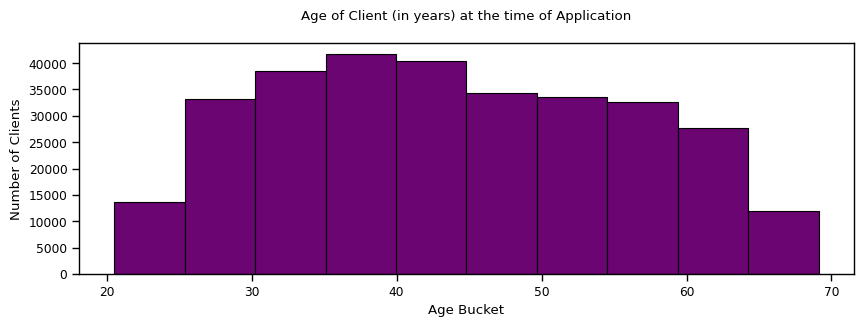

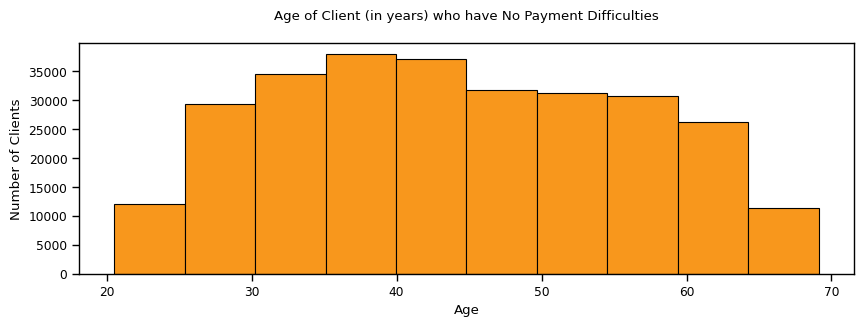

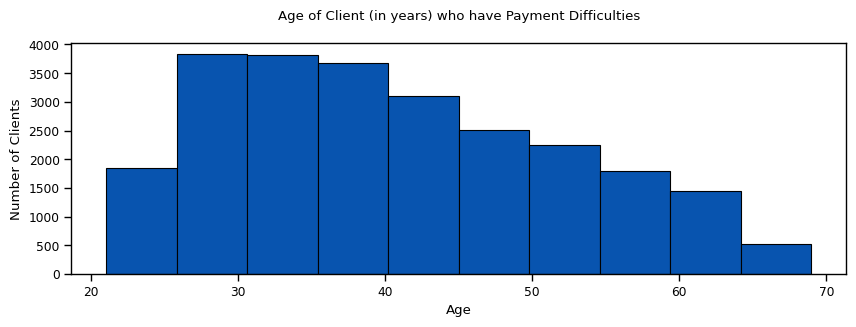

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(df_train['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='#6A0572')
plt.title('Age of Client (in years) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='#F8971C')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=10, edgecolor='black', color='#0854AF')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

Sebagian besar nasabah yang mengajukan pinjaman berada pada rentang usia 35-40 tahun, diikuti nasabah pada rentang usia 40-45 tahun. Sementara itu, jumlah pengajuan pinjaman untuk nasabah berusia <25 tahun atau usia >65 tahun sangat rendah.

Nasabah yang tidak mengalami kesulitan pembayaran adalah nasabah dengan rentang usia 35-45 tahun. Sedangkan nasabah yang mengalami kesulitan pembayaran adalah nasabah dengan rentang usia 25-35 tahun.

##Multivariate

###Grouped by Realty Ownership Status

**1. Car Ownership Status, The Number of Children, Target, and House/Flat Ownership Status**

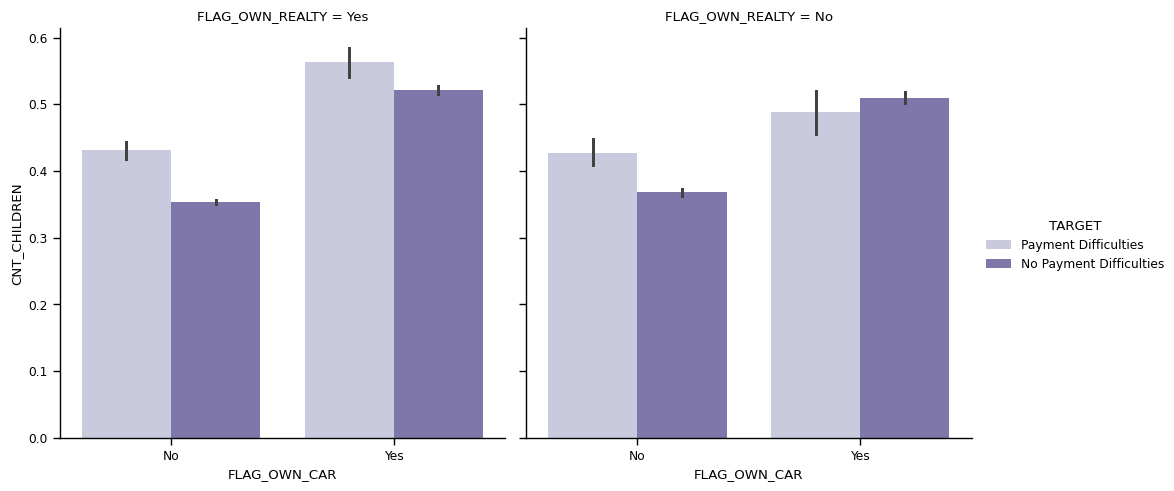

In [ ]:
sns.catplot(x = 'FLAG_OWN_CAR',
            y = 'CNT_CHILDREN',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar', palette = 'Purples',
            data = home)
plt.show()

Nasabah yang memiliki mobil dan rumah/flat memiliki masalah dalam mengembalikan pinjaman untuk jumlah anak yang tinggi dibandingkan dengan nasabah yang tidak memiliki rumah/flat.

**2. Income Type, Amount of Goods Price, Target, and House/Flat Ownership Status**

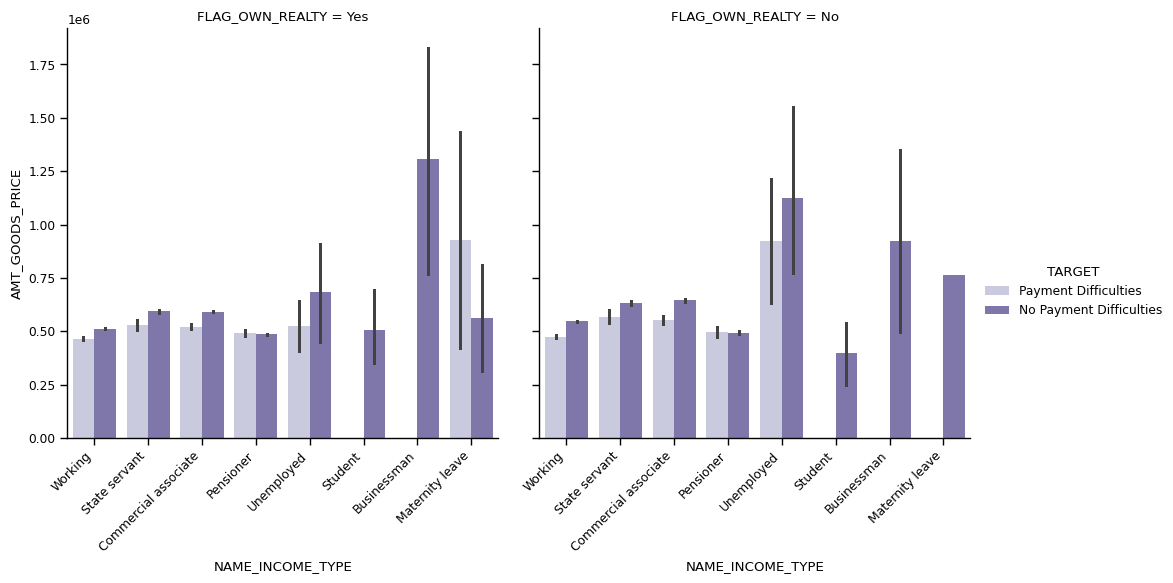

In [ ]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_GOODS_PRICE',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar', palette = 'Purples',
            data = home)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Nasabah dengan jenis penghasilan cuti hamil dan memiliki rumah/flat mengalami masalah dalam membayar pinjaman dibandingkan ketika nasabah tersebut tidak memiliki rumah/flat.

**3. Family Status, Amount of Income, Target, and House/Flat Ownership Status**

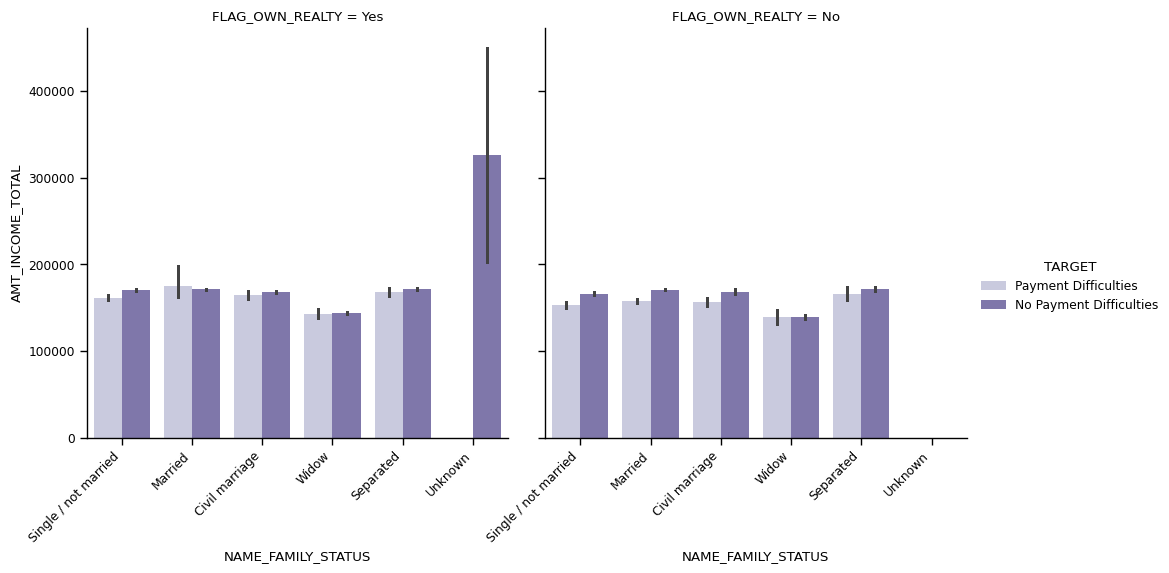

In [ ]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_INCOME_TOTAL',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar', palette = 'Purples',
            data = home)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Nasabah yang sudah menikah dan memiliki rumah/flat mengalami masalah dalam membayar kembali pinjaman dengan pendapatan menengah dibandingkan dengan saat nasabah tidak memiliki rumah/flat.

###Grouped by Car Ownership Status

**1. Contract Type, The Number of Children, Target, and Car Ownership Status**

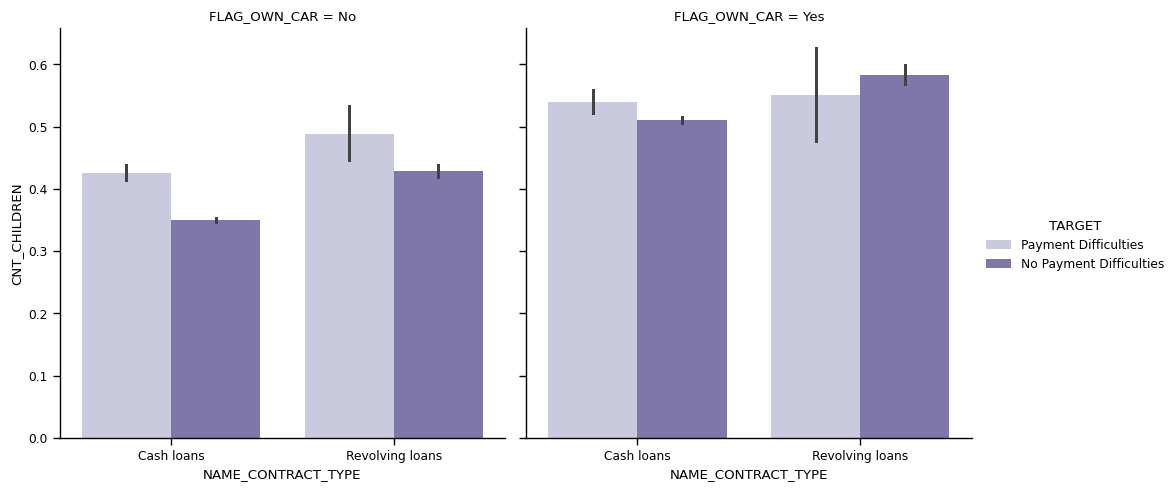

In [ ]:
sns.catplot(x = 'NAME_CONTRACT_TYPE',
            y = 'CNT_CHILDREN',
            hue = 'TARGET',
            col = 'FLAG_OWN_CAR',
            kind = 'bar', palette = 'Purples',
            data = home)
plt.show()

Nasabah yang mengajukan pinjaman revolving loans dan tidak memiliki mobil memiliki masalah dalam membayar kembali pinjaman dibandingkan ketika nasabah tersebut memiliki mobil.

**2. Income Type, Amount of Credit, Target, and Contract Type**

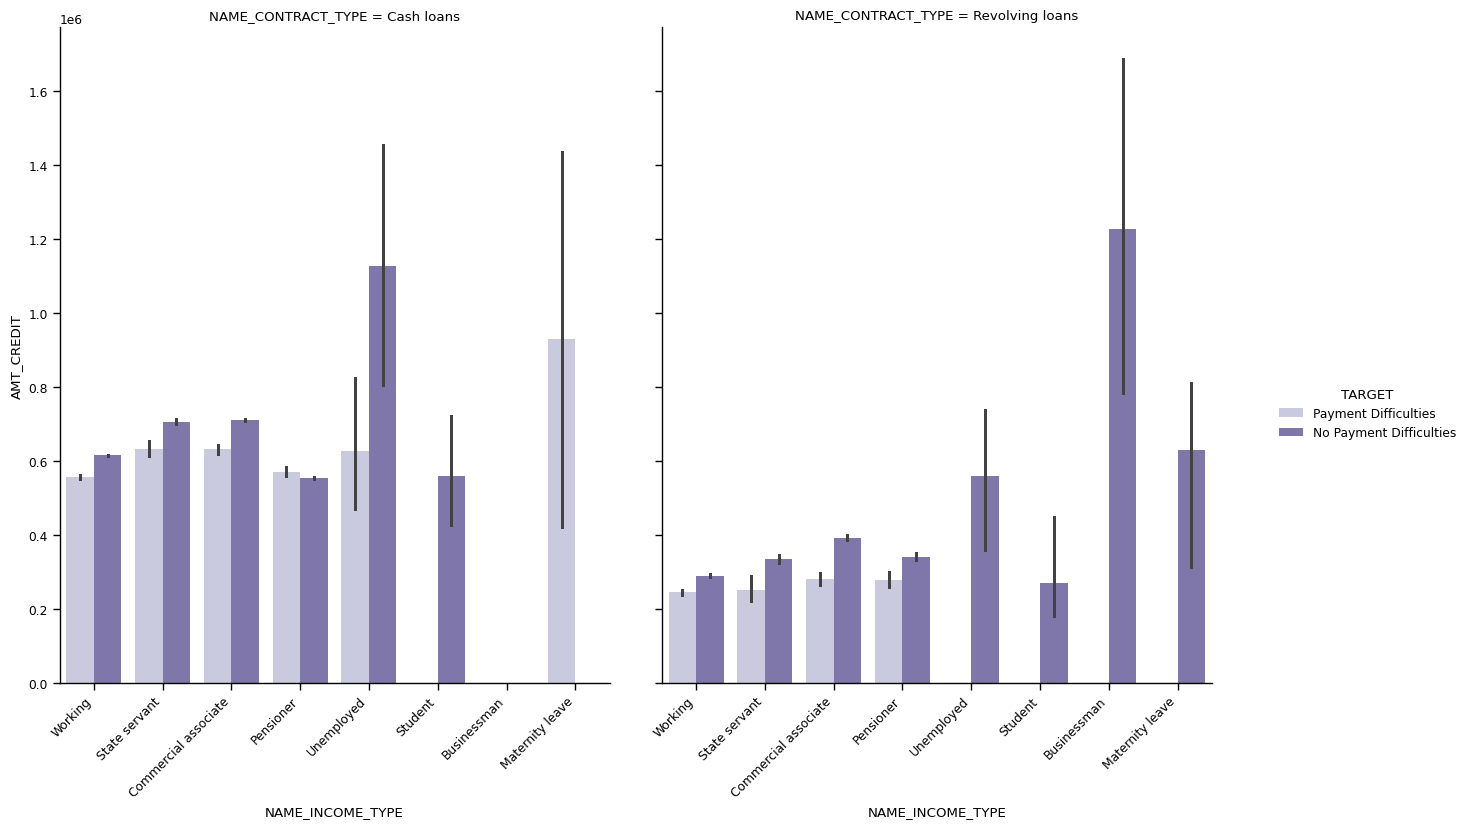

In [ ]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'NAME_CONTRACT_TYPE',
            kind = 'bar', palette = 'Purples',
            data = home)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

Nasabah yang jenis pendapatannya adalah cuti hamil dan mengajukan pinjaman cash loans, semua nya memiliki masalah dalam membayar kembali pinjaman dengan jumlah pinjaman sedang. Sementara semua klien dengan cuti hamil dan revolving loans tidak mengalami kesulitan untuk mengembalikan pinjaman.

Lebih dari 50% nasabah yang menganggur dan mengajukan pinjaman cash loans mengalami masalah dalam membayar kembali pinjaman dengan jumlah kredit menengah dari pinjaman tersebut. Sementara semua nasabah yang menganggur dengan pinjaman revolving loans tidak mengalami kesulitan untuk mengembalikan pinjaman.

Semua nasabah yang berstatus sebagai siswa tidak mengalami kesulitan untuk membayar kembali pinjaman baik dengan pinjaman cash loans atau pinjaman revolving loans dengan jumlah pinjaman kredit rendah hingga menengah.

###Grouped by Rating of Region where Client Lives

**1. Housing Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives**

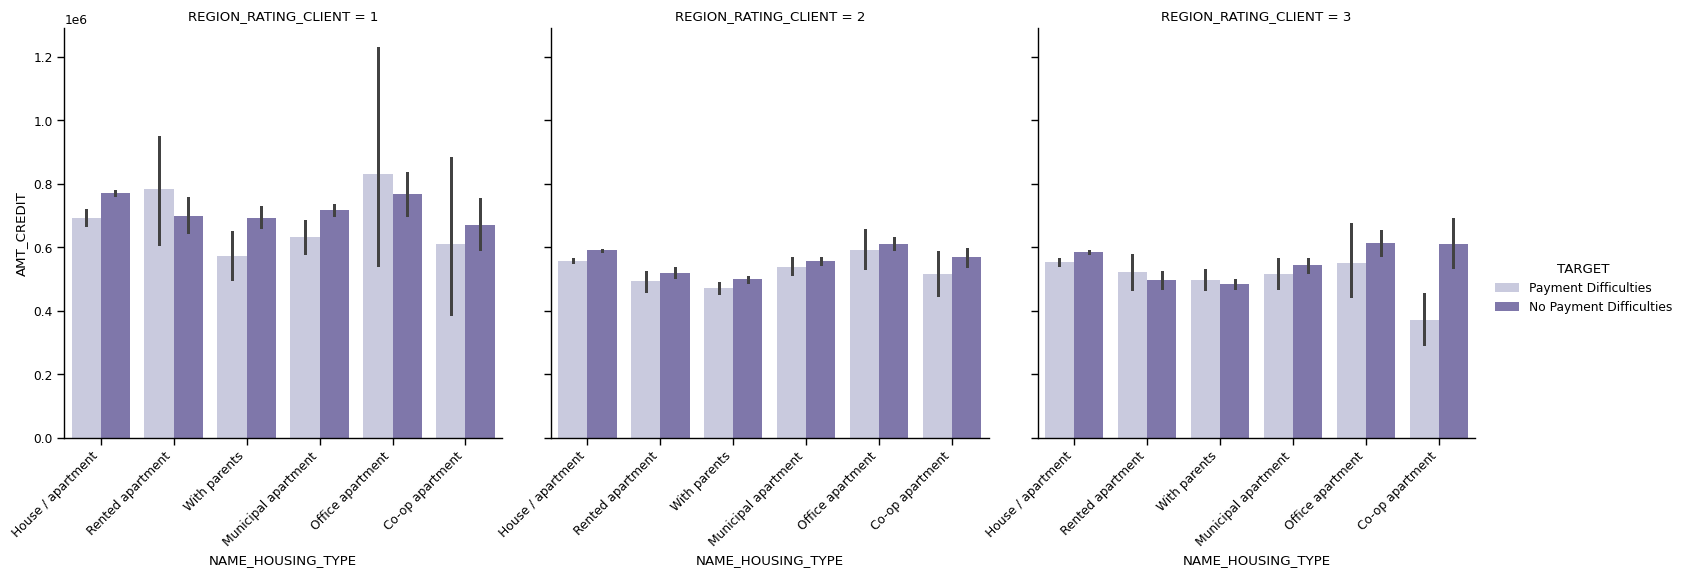

In [ ]:
fig = sns.catplot(x = 'NAME_HOUSING_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'REGION_RATING_CLIENT',
            kind = 'bar', palette = 'Purples',
            data = home)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Nasabah yang tinggal di apartemen sewaan dan apartemen kantor dan wilayahnya memiliki peringkat 1, memiliki masalah dalam membayar kembali pinjaman dibandingkan dengan nasabah di wilayah dengan peringkat 2 untuk jumlah pinjaman kredit sedang.

**2. Education Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives**

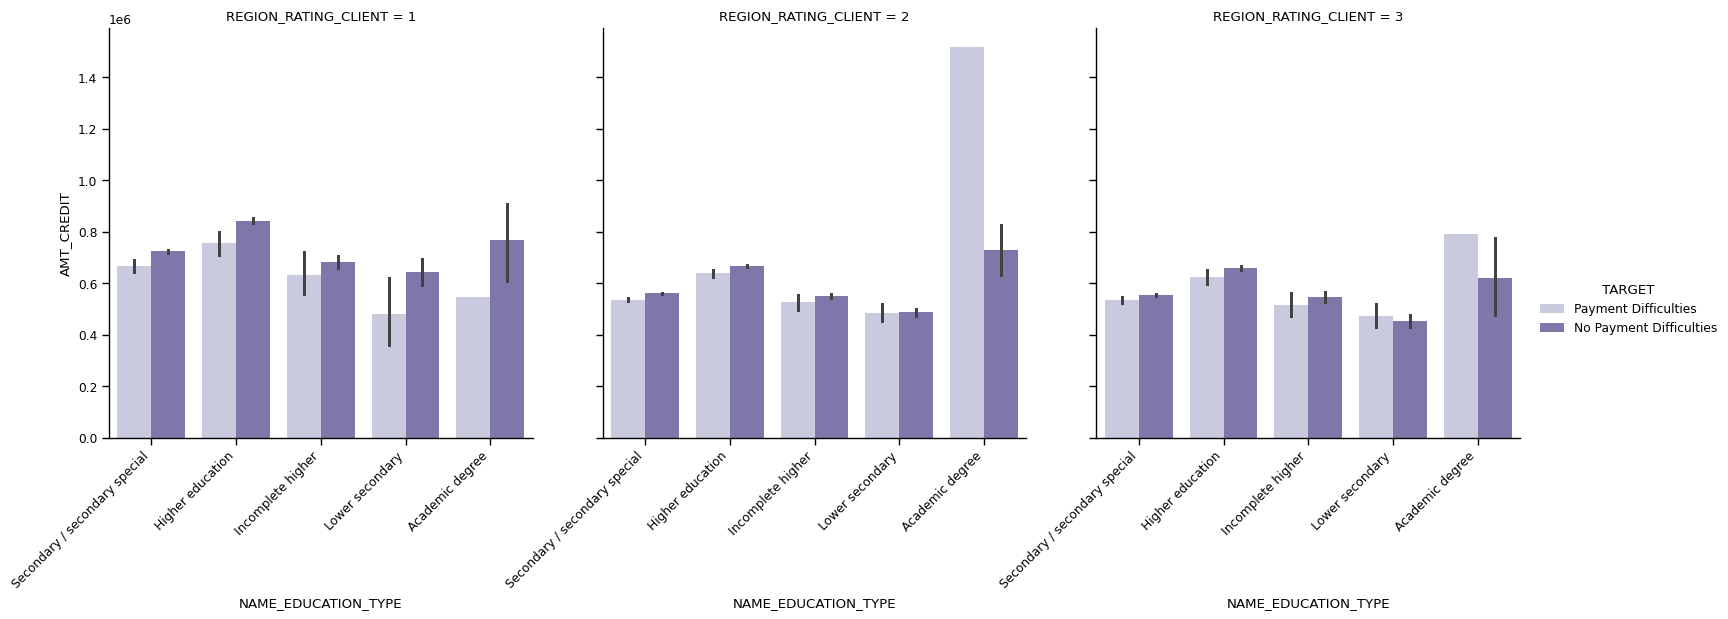

In [ ]:
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'REGION_RATING_CLIENT',
            kind = 'bar', palette = 'Purples',
            data = home)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Nasabah yang memiliki gelar akademik dan tinggal di wilayah dengan peringkat 2, memiliki masalah dalam membayar kembali pinjaman untuk jumlah kredit pinjaman yang lebih tinggi. Sementara nasabah dengan gelar yang sama tetapi tinggal di wilayah dengan peringkat 3 memiliki masalah dalam membayar pinjaman untuk kredit pinjaman dalam jumlah sedang.

**3. Family Status, Amount Credit of Loan, Target, and Rating of Region where Client Lives**

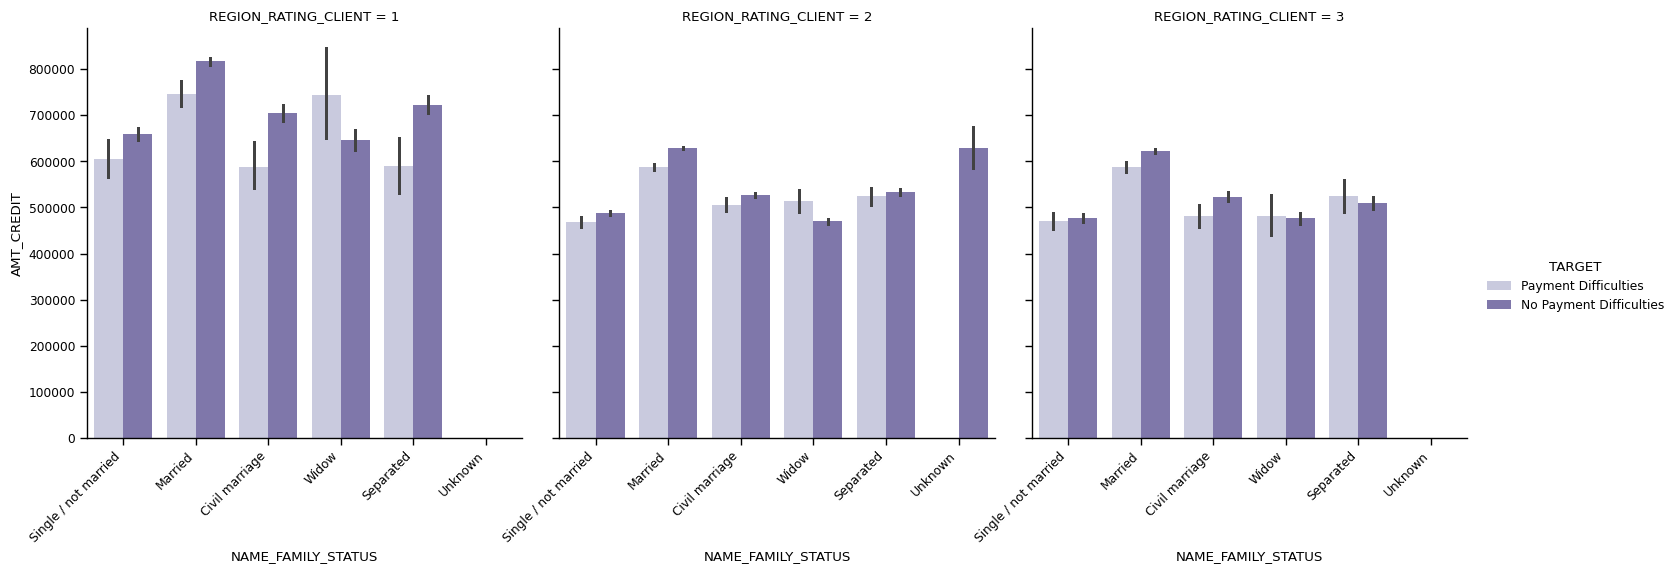

In [ ]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'REGION_RATING_CLIENT',
            kind = 'bar', palette = 'Purples',
            data = home)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Nasabah yang berstatus janda, baik yang tinggal di daerah dengan rating 1, 2, atau 3, mengalami kesulitan dalam mengembalikan pinjaman untuk kredit pinjaman dalam jumlah sedang hingga tinggi.

Nasabah yang memiliki status separated, dan tinggal di daerah dengan peringkat 3, memiliki masalah dalam membayar pinjaman dengan jumlah kredit pinjaman yang moderat dibandingkan dengan nasabah yang tinggal di daerah dengan peringkat 1 atau 2.